# Import requried libraries

In [1]:
import pandas as pd # for manipulating data
import numpy as np # Manipulating arrays
import keras # High level neural network API
import tensorflow as tf # Framework use for dataflow
from sklearn.model_selection import train_test_split # To split the data into train and validation
from tensorflow.keras.models import Sequential # To build neural network
from tensorflow.keras.layers import Dense # To add the dense layer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # To calculate the matrix 
from sklearn.metrics import classification_report # To print the report
from sklearn.metrics import precision_recall_curve # To print the precision-recall curve
from tensorflow.keras.optimizers import Adam # optimizer
import matplotlib.pyplot as plt # To plot the graph
from tensorflow.keras.models import load_model # To load the model
from keras.utils import CustomObjectScope #Provides a scope that changes to _GLOBAL_CUSTOM_OBJECTS cannot escape.
from keras.initializers import glorot_uniform #Initializations define the way to set the initial random weights of Keras layers.

Using TensorFlow backend.


In [2]:
# Read the file
df = pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


# Pre-processing 

In [3]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [4]:
print("Length of Musk is :",len(df[df['class']== 1]))
print("Length of Non-Musk is :",len(df[df['class']== 0]))

Length of Musk is : 1017
Length of Non-Musk is : 5581


In [5]:
# check the, wether there is any null value
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [6]:
# Drop unnecessary columns(ID ,molecule_name,conformation_name)
df = df.drop(columns=['ID','molecule_name','conformation_name'])
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


### Split the data into train and test

In [7]:
train, test= train_test_split(df,test_size=0.20,random_state=6)
print(f"Row in training set:{len(train)}\nRow in testing set:{len(test)} ")

Row in training set:5278
Row in testing set:1320 


In [8]:
train_X = train[train.columns[:-1]]
train_Y = train[train.columns[-1]]

test_X = test[test.columns[:-1]]
test_Y = test[test.columns[-1]]

In [9]:
# CHeck the shape of the data
train_X.shape

(5278, 166)

In [10]:
train_Y.shape

(5278,)

# Small model
### Named small model because only one hidden layer with 60 nodes and a ReLU activation function are used followed by an output layer with a single node and a sigmoid activation function
### The model will predict whether the taken compound is Non-Musk(0) or Musk(1) 

In [11]:
model = Sequential()
model.add(Dense(60, input_dim=166, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                10020     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 10,081
Trainable params: 10,081
Non-trainable params: 0
_________________________________________________________________


### The model will be fit using the binary cross entropy loss function and we will use the efficient Adam version of stochastic gradient descent. The model will also monitor the classification accuracy metric

In [12]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fitting the model with 9 epochs with the batch size of 100

In [13]:
history = model.fit(train_X,train_Y, epochs = 9, batch_size=100,  validation_data=(test_X, test_Y) )

Train on 5278 samples, validate on 1320 samples
Epoch 1/9
5278/5278 [==============================] - 2s 303us/sample - loss: 5.7875 - acc: 0.8613 - val_loss: 2.3946 - val_acc: 0.8932
Epoch 2/9
5278/5278 [==============================] - 0s 79us/sample - loss: 1.4188 - acc: 0.9164 - val_loss: 1.6680 - val_acc: 0.9220
Epoch 3/9
5278/5278 [==============================] - 0s 86us/sample - loss: 0.9452 - acc: 0.9360 - val_loss: 1.0329 - val_acc: 0.9295
Epoch 4/9
5278/5278 [==============================] - 0s 88us/sample - loss: 0.6827 - acc: 0.9456 - val_loss: 1.0216 - val_acc: 0.9432
Epoch 5/9
5278/5278 [==============================] - 0s 91us/sample - loss: 0.5540 - acc: 0.9566 - val_loss: 0.7567 - val_acc: 0.9447
Epoch 6/9
5278/5278 [==============================] - 0s 87us/sample - loss: 0.4073 - acc: 0.9595 - val_loss: 1.1352 - val_acc: 0.9364
Epoch 7/9
5278/5278 [==============================] - 0s 94us/sample - loss: 0.3572 - acc: 0.9657 - val_loss: 0.6044 - val_acc: 0.9447

### Visualize the model accuracy and model loss

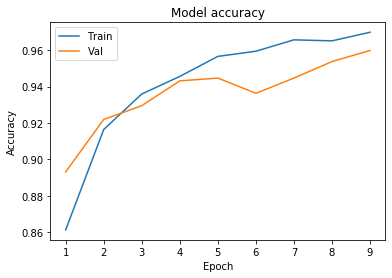

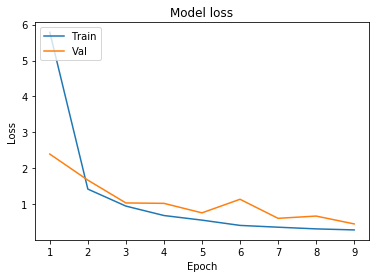

In [14]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, 9)

# Make predictions

In [15]:
preds= model.predict(test_X)
preds_classes = model.predict_classes(test_X)

# Calculate matrix
### Three matrics, in addition to classification accuracy, that are commonly required for a neural network model on a binary classification problem are:
### Accuracy : (TP + TN) / (TP +TN+FP+FN)    
### Precision : TP / (TP + FP)
### Recall : TP / (TP + FN)
### F1 Score : 2 TP / (2 TP + TP + FN)

In [16]:
# reduce to 1d array before calculating the matrix
preds = preds[:, 0]
preds_classes =preds_classes[:, 0]

In [17]:
print(classification_report(test_Y, preds_classes))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1096
           1       0.86      0.92      0.89       224

    accuracy                           0.96      1320
   macro avg       0.92      0.94      0.93      1320
weighted avg       0.96      0.96      0.96      1320



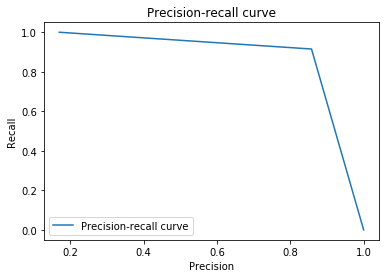

In [18]:
precision, recall, thresholds = precision_recall_curve(test_Y, preds_classes)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

# Large model
### Named large model because more than one hidden layers are used. 60 nodes in 1st layer,  30 nodes in 2rd layers along with a output layer with a single node

In [19]:
model = Sequential()
model.add(Dense(60, input_dim=166, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                10020     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 11,881
Trainable params: 11,881
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_X,train_Y, epochs = 9, batch_size=100,  validation_data=(test_X, test_Y) )

Train on 5278 samples, validate on 1320 samples
Epoch 1/9
5278/5278 [==============================] - 1s 234us/sample - loss: 1.9529 - acc: 0.8846 - val_loss: 0.9884 - val_acc: 0.8818
Epoch 2/9
5278/5278 [==============================] - 0s 86us/sample - loss: 0.4761 - acc: 0.9341 - val_loss: 0.5672 - val_acc: 0.9250
Epoch 3/9
5278/5278 [==============================] - 0s 88us/sample - loss: 0.3079 - acc: 0.9521 - val_loss: 0.3655 - val_acc: 0.9409
Epoch 4/9
5278/5278 [==============================] - 1s 100us/sample - loss: 0.1994 - acc: 0.9613 - val_loss: 0.3297 - val_acc: 0.9447
Epoch 5/9
5278/5278 [==============================] - 1s 151us/sample - loss: 0.1642 - acc: 0.9661 - val_loss: 0.3117 - val_acc: 0.9386
Epoch 6/9
5278/5278 [==============================] - 1s 98us/sample - loss: 0.1822 - acc: 0.9615 - val_loss: 0.2979 - val_acc: 0.9402
Epoch 7/9
5278/5278 [==============================] - 1s 95us/sample - loss: 0.1171 - acc: 0.9704 - val_loss: 0.1960 - val_acc: 0.95

### Visualize the model accuracy and model loss

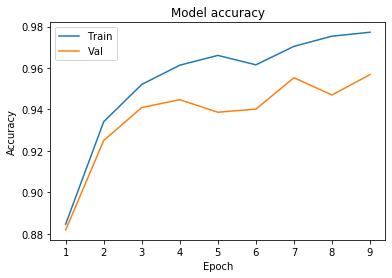

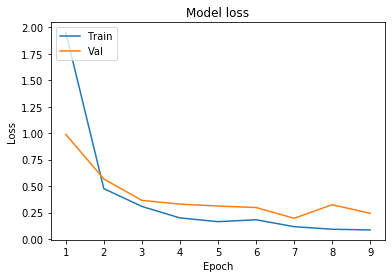

In [21]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, 9)

# Make predictions

In [22]:
preds= model.predict(test_X)
preds_classes = model.predict_classes(test_X)

# Calculate metrix

In [23]:
# reduce to 1d array before calculating the matrix
preds = preds[:, 0]
preds_classes =preds_classes[:, 0]

In [24]:
print(classification_report(test_Y, preds_classes))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1096
           1       0.91      0.83      0.87       224

    accuracy                           0.96      1320
   macro avg       0.94      0.90      0.92      1320
weighted avg       0.96      0.96      0.96      1320



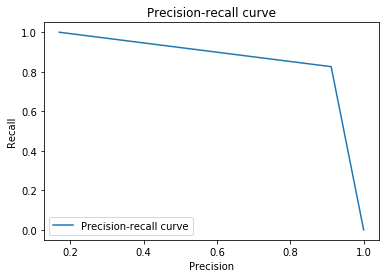

In [25]:
precision, recall, thresholds = precision_recall_curve(test_Y, preds_classes)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

# Model save
### This function saves
        .The architecture of the model, allowing to create the model
        .The weights of the model
        .The training configuration(loss, optimizer)
        .The state of the optimizer, allowing to resume training exactly where you left off.

In [26]:
model.save('model.h5')

# Load model

In [27]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        new_model = load_model('model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
